In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import IVM
import warnings
warnings.filterwarnings('ignore')

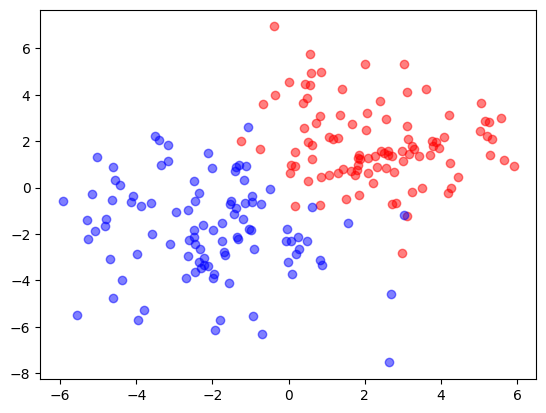

In [40]:
np.random.seed(611)

mu_1 = np.array([2, 2])
cov_1 = np.array([[3, -1], 
                  [-1, 3]])

mu_2 = np.array([-2, -2])
cov_2 = np.array([[4, -1], 
                  [-1, 4]])

X_1 = np.random.multivariate_normal(mean = mu_1, cov = cov_1, size = 100)
X_2 = np.random.multivariate_normal(mean = mu_2, cov = cov_2, size = 100)

plt.scatter(X_1[:, 0], X_1[:, 1], color = "red", alpha = 0.5)
plt.scatter(X_2[:, 0], X_2[:, 1], color = "blue", alpha = 0.5)

In [39]:
X = np.vstack((X_1, X_2))
y = np.vstack((np.zeros(shape = (X_1.shape[0], 1)), np.ones(shape = (X_2.shape[0], 1))))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 611)

In [42]:
lr = LogisticRegression(penalty="l2", multi_class="multinomial").fit(X_train, y_train)

In [4]:
svm = SVC(kernel = "rbf").fit(X_train, y_train)

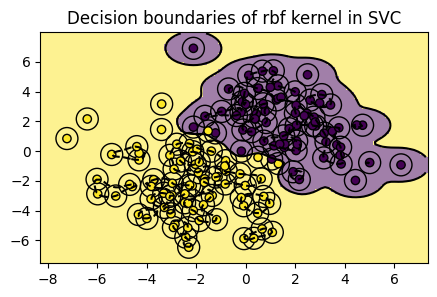

In [5]:
IVM.plot_training_data_with_decision_boundary("rbf", X_train, y_train)

In [6]:
print(f"Number of support vectors: {len(svm.support_vectors_)}")

Number of support vectors: 29


In [14]:
preds = svm.predict(X_test)

In [15]:
print("SVM: \n", classification_report(y_test, preds))

SVM: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [43]:
preds = lr.predict(X_test)
print("LR: \n", classification_report(y_test, preds))

LR: 
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        26
         1.0       1.00      0.92      0.96        24

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [16]:
np.random.seed(611)
import_vectors, loss_func, optimal_a = IVM.fit_rbf(X_train, y_train)

S:  1 R:  149
S:  2 R:  148
S:  3 R:  147
S:  4 R:  146
S:  5 R:  145
S:  6 R:  144
S:  7 R:  143
S:  8 R:  142
S:  9 R:  141
S:  10 R:  140
S:  11 R:  139
S:  12 R:  138
S:  13 R:  137
S:  14 R:  136
S:  15 R:  135
S:  16 R:  134
S:  16 R:  134 a:  [[-1.79136826]
 [ 1.87867243]
 [-2.21218533]
 [ 2.35347621]
 [ 1.9765939 ]
 [-2.27629923]
 [ 1.64384189]
 [-1.34503495]
 [ 1.98703386]
 [ 1.62700723]
 [ 1.71238266]
 [-1.48068329]
 [-1.32418964]
 [-1.23875706]
 [ 1.08650414]
 [-0.34585986]]


In [17]:
print("Number of import vectors: ", len(import_vectors))

Number of import vectors:  16


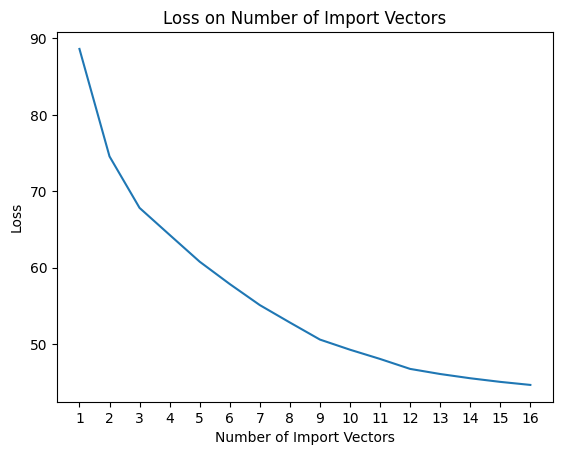

In [18]:
plt.plot(range(1, 1 + len(np.array(import_vectors).reshape(-1, 2))), np.array(loss_func).reshape(-1,))
plt.title("Loss on Number of Import Vectors")
plt.xlabel("Number of Import Vectors")
plt.ylabel("Loss")
plt.xticks(np.arange(1, len(import_vectors) + 1, step = 1))
plt.show()

In [19]:
preds = []
for x in X_test:
    pred = IVM.predict_one_rbf(optimal_a, import_vectors, x)
    preds.append(pred)

In [20]:
print("IVM: \n", classification_report(y_test, preds))

IVM: 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       0.96      1.00      0.98        24

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Text(0.5, 1.0, 'Import vectors vs Support vectors for Mixture of Gaussians')

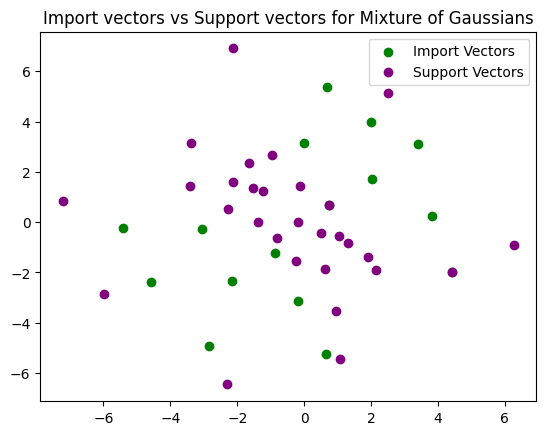

In [21]:
import_vectors = np.array(import_vectors)

_, ax = plt.subplots(1, 1)
ax.scatter(import_vectors[:, 0], import_vectors[:, 1], color = "green")
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], color = "purple")
plt.legend(labels = ["Import Vectors", "Support Vectors"])
plt.title("Import vectors vs Support vectors for Mixture of Gaussians")

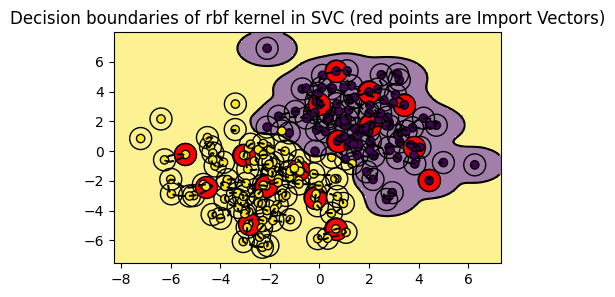

In [22]:
IVM.plot_training_data_with_decision_boundary_IVM("rbf", X, y, import_vectors)

In [45]:
mu_1 = np.array([2, 2])
cov_1 = np.array([[1, 0], 
                  [0, 1]])

mu_2 = np.array([-2, -2])
cov_2 = np.array([[1, 0], 
                  [0, 1]])

mu_3 = np.array([5, -2])
cov_3 = np.array([[1, 0], 
                  [0, 1]])

X_1 = np.random.multivariate_normal(mean = mu_1, cov = cov_1, size = 50)
X_2 = np.random.multivariate_normal(mean = mu_2, cov = cov_2, size = 50)
X_3 = np.random.multivariate_normal(mean = mu_3, cov = cov_3, size = 50)
print(X_1.shape, X_2.shape, X_3.shape)

(50, 2) (50, 2) (50, 2)


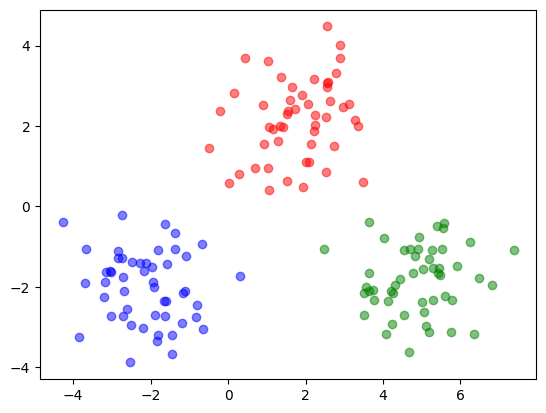

In [24]:
plt.scatter(X_1[:, 0], X_1[:, 1], color = "red", alpha = 0.5)
plt.scatter(X_2[:, 0], X_2[:, 1], color = "blue", alpha = 0.5)
plt.scatter(X_3[:, 0], X_3[:, 1], color = "green", alpha = 0.5)

In [46]:
X = np.vstack((X_1, X_2, X_3))
y = np.vstack((np.zeros(shape = (X_1.shape[0], 1)), np.ones(shape = (X_2.shape[0], 1)), 2*np.ones(shape = (X_3.shape[0], 1))))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 611)

In [27]:
svm = SVC().fit(X_train, y_train)

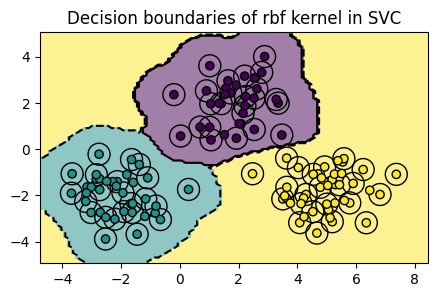

In [28]:
IVM.plot_training_data_with_decision_boundary("rbf", X_train, y_train)

In [29]:
print(f"Number of support vectors: {len(svm.support_vectors_)}")

Number of support vectors: 25


In [30]:
preds = svm.predict(X_test)
print("SVM: \n", classification_report(y_test, preds))

SVM: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [49]:
lr = LogisticRegression(penalty="l2", multi_class="multinomial").fit(X_train, y_train)
preds = lr.predict(X_test)
print("LR: \n", classification_report(y_test, preds))

LR: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [31]:
np.random.seed(611)
preds = []
num_import_vecs = []

for x in X_test:
    probs = []
    for i in [0, 1, 2]:
        y_train_recode = np.where(y_train == i, 1, 0)
        y_test_recode = np.where(y_test == i, 1, 0)
        import_vectors, loss_func, optimal_a = IVM.fit_rbf(X_train, y_train_recode)
        p = IVM.predict_one_rbf_multiclass(optimal_a, import_vectors, x)
        print("p: ", p)
        probs.append(p)
        num_import_vecs.append(len(np.array(import_vectors).reshape(-1, 2)))
    print("max prob: ", np.argmax(np.array(probs)))
    preds.append(np.argmax(np.array(probs)))

S:  1 R:  111
S:  2 R:  110
S:  3 R:  109
S:  4 R:  108
S:  5 R:  107
S:  6 R:  106
S:  7 R:  105
S:  8 R:  104
S:  9 R:  103
S:  10 R:  102
S:  11 R:  101
S:  12 R:  100
S:  13 R:  99
S:  14 R:  98
S:  15 R:  97
S:  15 R:  97 a:  [[-1.00977144]
 [-2.39919914]
 [ 1.86969031]
 [ 1.55647577]
 [ 1.40692221]
 [-1.41867478]
 [-0.69080231]
 [-1.25300155]
 [-1.35406944]
 [-1.01409135]
 [-0.89328097]
 [-1.4317908 ]
 [-1.19084735]
 [-1.08780855]
 [ 0.58866297]]
p:  [0.78137098]
S:  1 R:  111
S:  2 R:  110
S:  3 R:  109
S:  4 R:  108
S:  5 R:  107
S:  6 R:  106
S:  7 R:  105
S:  8 R:  104
S:  9 R:  103
S:  10 R:  102
S:  11 R:  101
S:  12 R:  100
S:  13 R:  99
S:  13 R:  99 a:  [[-2.1761312 ]
 [ 2.40958492]
 [-1.69204431]
 [-1.55592611]
 [-1.47500697]
 [-1.75368538]
 [-1.53714619]
 [ 1.24879284]
 [ 1.35810517]
 [-1.402615  ]
 [ 1.01312182]
 [ 0.82956747]
 [-0.63176732]]
p:  [0.21690138]
S:  1 R:  111
S:  2 R:  110
S:  3 R:  109
S:  4 R:  108
S:  5 R:  107
S:  6 R:  106
S:  7 R:  105
S:  8 R:  10

In [37]:
print("IVM: \n", classification_report(y_test, preds))

IVM: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [34]:
print(f"Number of import vectors: {np.mean(num_import_vecs)}")

Number of import vectors: 14.0


Average number of import vectors in OvR IVM: 14

Average number of support vectors in OvR SVM: 26